# Customer Churn Analysis Project

Project Description

Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 


# Importing Libraries & Dataset:-¶

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings("ignore")

# Importing the required Libraries to perform EDA

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv")
df

# Importing the dataset into Python from the system

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
Telecom_customer_churn=pd.DataFrame(data=df)
Telecom_customer_churn

# Making a Structured Dataframe of the Dataset and saving it in variable "Telecom_customer_churn"

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# EDA (Exploratory Data Analysis):-

In [4]:
Telecom_customer_churn.shape

# Displaying rows and columns of dataset

(7043, 21)

In Telecom_customer_churn dataset we can see 7043 rows and 21 columns.

In [5]:
# Check duplicate values
Telecom_customer_churn.duplicated().any()

False

Dataset do not have duplicate values

In [6]:
Telecom_customer_churn.info()

# The information regarding the data types and null values present in the columns of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
# Now checking  features description.
Telecom_customer_churn.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Here we can see 75% of peoples have tenure less than 55 months

Average Monthly charges are USD 64.76 whereas 75% customers pay more than USD 89.85 per month and maximum Monthly Charges is 118.75 USD.

In [8]:
#unique values of dataset
Telecom_customer_churn.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [9]:
Telecom_customer_churn.isnull().sum()

# checking null values

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

There are no null values present in the dataset

<AxesSubplot:>

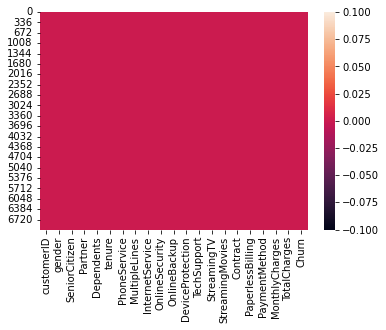

In [10]:
# Checking null values using graph
sns.heatmap(Telecom_customer_churn.isnull())

# Univariate Analysis:

In [11]:
Telecom_customer_churn['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

<AxesSubplot:xlabel='gender', ylabel='count'>

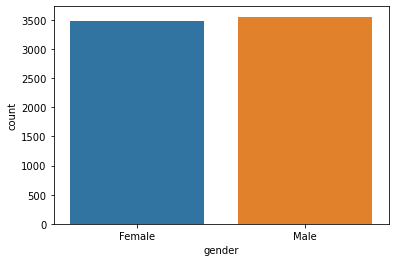

In [12]:
sns.countplot(Telecom_customer_churn["gender"])

# Graphical representation showing gender in the Dataset

The graph shows that there are almost equal number of male and female customers present in the Dataset

In [13]:
Telecom_customer_churn['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

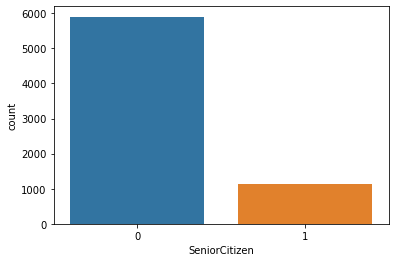

In [14]:
sns.countplot(Telecom_customer_churn["SeniorCitizen"])

# Graphical representation showing SeniorCitizen in the Dataset

The Graph shows that very few customers in the Dataset are Senior Citizens

In [15]:
Telecom_customer_churn['Partner'].value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

<AxesSubplot:xlabel='Partner', ylabel='count'>

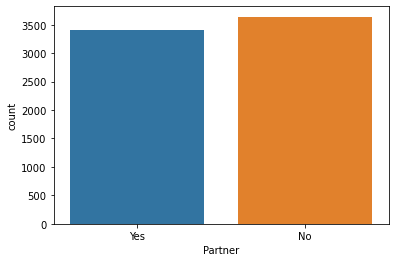

In [16]:
sns.countplot(Telecom_customer_churn["Partner"])

# Graphical representation showing Partners in the Dataset

The graph shows that there are almost equal number of people with and without life partners

In [17]:
Telecom_customer_churn['Dependents'].value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

<AxesSubplot:xlabel='Dependents', ylabel='count'>

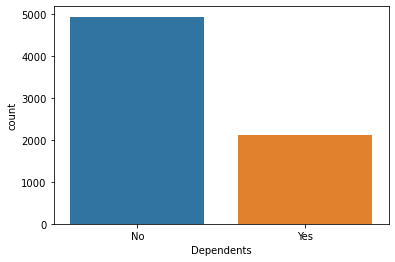

In [18]:
sns.countplot(Telecom_customer_churn["Dependents"])

# Graphical representation showing Dependents in the Dataset

The graph shows that most customers in the Dataset do not have any dependents while few customers have dependents

In [19]:
 Telecom_customer_churn['PhoneService'].value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

<AxesSubplot:xlabel='PhoneService', ylabel='count'>

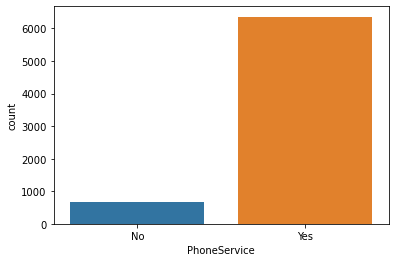

In [20]:
sns.countplot(Telecom_customer_churn["PhoneService"])

# Graphical representation showing PhoneService in the Dataset

 The Graph shows most customers have Phone services while very few customers do not take phone services

In [21]:
Telecom_customer_churn['MultipleLines'].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

<AxesSubplot:xlabel='MultipleLines', ylabel='count'>

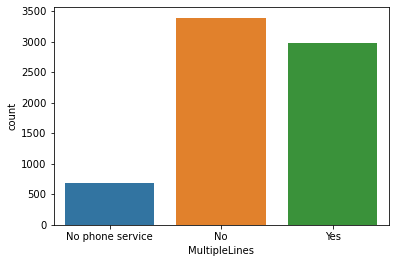

In [22]:
sns.countplot(Telecom_customer_churn["MultipleLines"])

# Graphical representation showing MultipleLines in the Dataset

The Graph shows that some customers with phone servies have opted for multiple lines 


In [23]:
Telecom_customer_churn['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

<AxesSubplot:xlabel='InternetService', ylabel='count'>

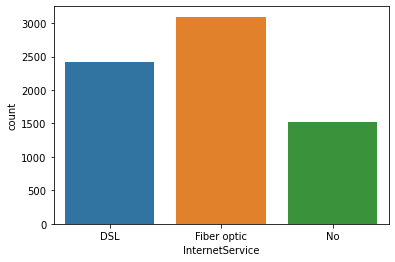

In [24]:
sns.countplot(Telecom_customer_churn["InternetService"])

# Graphical representation showing InternetService in the Dataset

The Graph shows that most customers have fiber optic internet service while few customers do not take internet services 

In [25]:
Telecom_customer_churn['OnlineSecurity'].value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

<AxesSubplot:xlabel='OnlineSecurity', ylabel='count'>

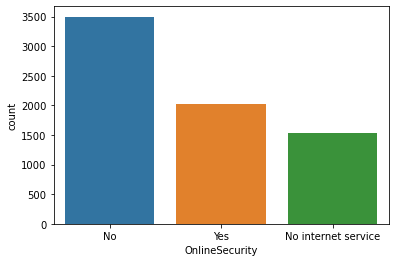

In [26]:
sns.countplot(Telecom_customer_churn["OnlineSecurity"])

# Graphical representation showing OnlineSecurity in the Dataset

The Graph shows that few customers who have opted for internet services have also opted for online security services

In [27]:
Telecom_customer_churn['OnlineBackup'].value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

<AxesSubplot:xlabel='OnlineBackup', ylabel='count'>

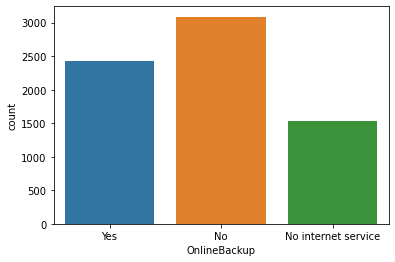

In [28]:
sns.countplot(Telecom_customer_churn["OnlineBackup"])

# Graphical representation showing OnlineBackup in the Dataset

The Graph shows that few customers who have opted for internet services have also opted for online backup services

In [29]:
Telecom_customer_churn['DeviceProtection'].value_counts()

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

<AxesSubplot:xlabel='DeviceProtection', ylabel='count'>

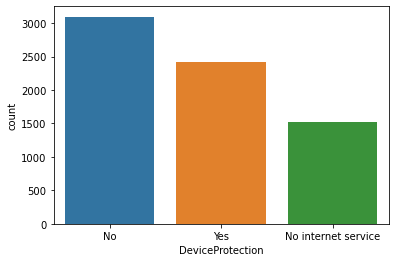

In [30]:
sns.countplot(Telecom_customer_churn["DeviceProtection"])

# Graphical representation showing DeviceProtection in the Dataset

The Graph shows that some customers who have opted for internet services have also opted for device protection services

In [31]:
Telecom_customer_churn['TechSupport'].value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

<AxesSubplot:xlabel='TechSupport', ylabel='count'>

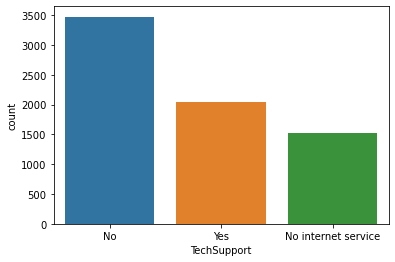

In [32]:
sns.countplot(Telecom_customer_churn["TechSupport"])

# Graphical representation showing TechSupport in the Dataset

The Graph shows that very few customers who have opted for internet services have also opted for tech support services

In [33]:
Telecom_customer_churn['StreamingTV'].value_counts()

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

<AxesSubplot:xlabel='StreamingTV', ylabel='count'>

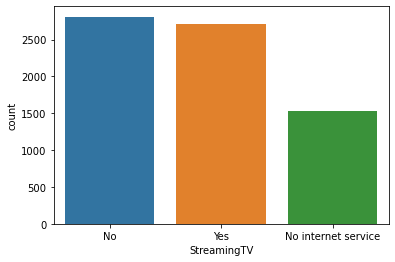

In [34]:
sns.countplot(Telecom_customer_churn["StreamingTV"])

# Graphical representation showing StreamingTV in the Dataset

The Graph shows that mostly equal number of customers are there who have and who have not opted for Movie Stream Services

In [35]:
Telecom_customer_churn['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

<AxesSubplot:xlabel='Contract', ylabel='count'>

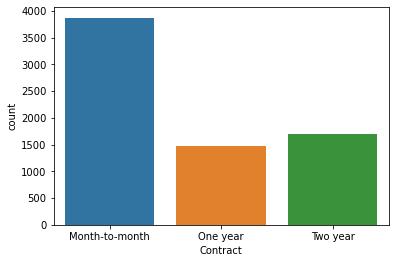

In [36]:
sns.countplot(Telecom_customer_churn["Contract"])

# Graphical representation showing Contract in the Dataset

The Graph shows that mostly Customers prefer Month to Month payment contracts .While few cutomers prefer for long term payment contracts of 1 and 2 years

In [37]:
Telecom_customer_churn['PaperlessBilling'].value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

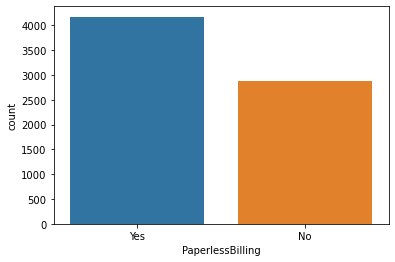

In [38]:
sns.countplot(Telecom_customer_churn["PaperlessBilling"])

# Graphical representation showing PaperlessBilling in the Dataset

The Graph shows that most customers have opted for paperless billing system

In [39]:
Telecom_customer_churn['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

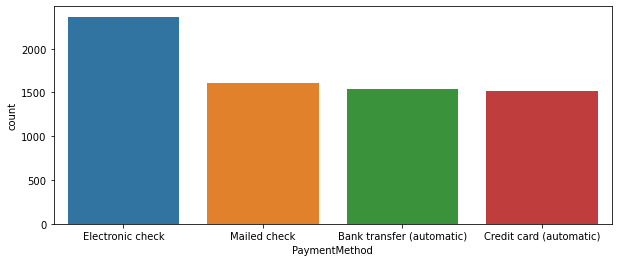

In [40]:
plt.figure(figsize=(10,4))
sns.countplot(Telecom_customer_churn["PaymentMethod"])

# Graphical representation showing PaymentMethod in the Dataset

The Graph shows that most customers prefer to keep their payment mode as Electronic Check

Target Variable :-

In [41]:
Telecom_customer_churn['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='count'>

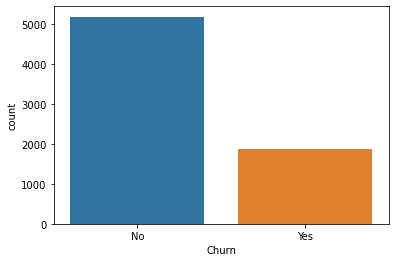

In [42]:
sns.countplot(Telecom_customer_churn["Churn"])

# Graphical representation showing Churn in the Dataset

The Graph shows that around 40% of customers leave the company services and therefore shows the high churn rate.our target variable is imbalance so we need to balance the dataset using oversampling technique

# Bi-variate Analysis:

<AxesSubplot:xlabel='Contract', ylabel='MonthlyCharges'>

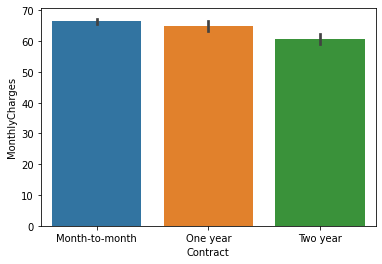

In [43]:
sns.barplot(x=Telecom_customer_churn["Contract"], y=Telecom_customer_churn["MonthlyCharges"])

# The Graph shows that monthly charges are little high in month to month and slighly low in year and 2 year contract
# It is because long term contract cost little less so that more people gets encouraged to opt for longer contract plans

<AxesSubplot:xlabel='Contract', ylabel='tenure'>

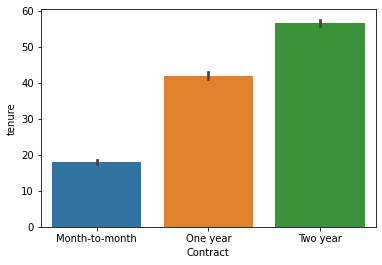

In [44]:
sns.barplot(x=Telecom_customer_churn["Contract"], y=Telecom_customer_churn["tenure"])

# It shows for how much tenure the customers do which kind of contract with the company

<AxesSubplot:xlabel='Contract', ylabel='count'>

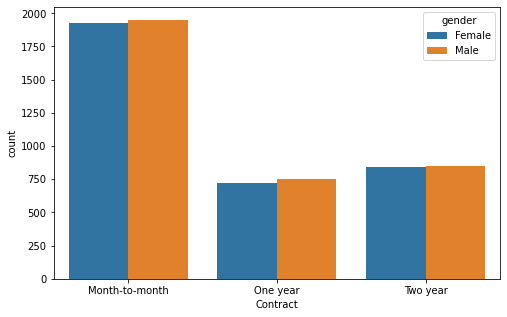

In [45]:
plt.figure(figsize=(8,5))
sns.countplot(Telecom_customer_churn["Contract"], hue=Telecom_customer_churn["gender"])

# It shows that there are almost equal number of male and female customers doing same kind of contracts with the company

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

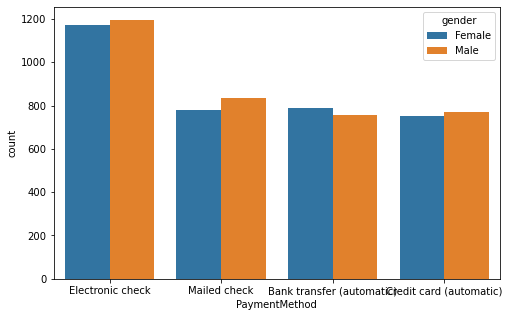

In [46]:
plt.figure(figsize=(8,5))
sns.countplot(Telecom_customer_churn["PaymentMethod"], hue=Telecom_customer_churn["gender"])

# It shows that there are almost equal number of male and female customers using same kind of payment methods

# Multivariate Analysis:-

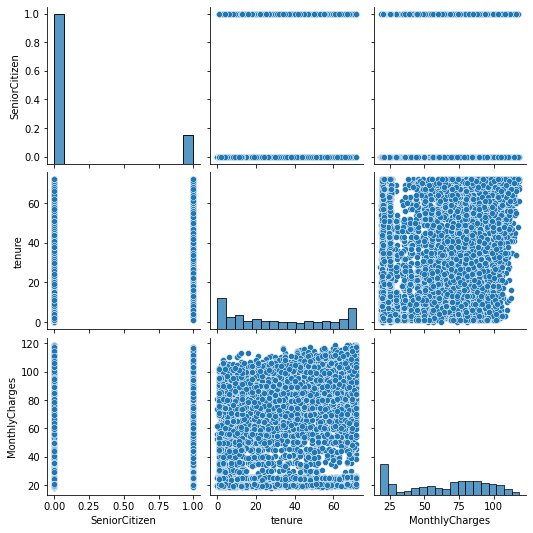

In [47]:
sns.pairplot(Telecom_customer_churn)

# It is showing the correlation of each variable with others in graphical presentation

# Checking Distribution of Dataset :-

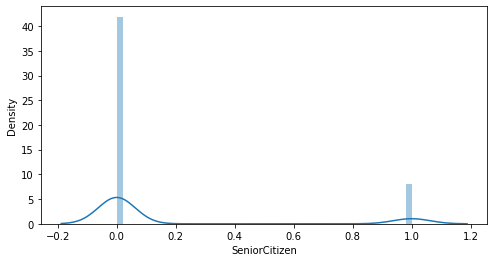

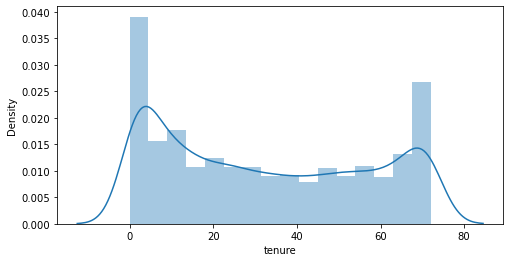

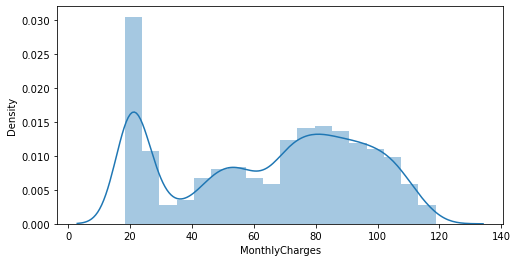

In [48]:
for i in Telecom_customer_churn.columns:
    if Telecom_customer_churn[i].dtypes!='object':
        plt.figure(figsize=(8,4))
        sns.distplot(Telecom_customer_churn[i])

# Label Encoding:-

In [49]:
Telecom_customer_churn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [50]:
from sklearn.preprocessing import LabelEncoder

# Importing the Label Encoder from Sklearn Library

In [51]:
le=LabelEncoder()

In [52]:
for i in Telecom_customer_churn.columns:
    if Telecom_customer_churn[i].dtypes=="object":
        Telecom_customer_churn[i]=le.fit_transform(Telecom_customer_churn[i].values.reshape(-1,1))
        
# Running a for loop to give numeric values to strings using the Label Encoder in Telecom_customer_churn dataset

In [53]:
Telecom_customer_churn

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,2505,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1466,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,157,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1400,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4853,1,0,1,1,24,1,2,0,2,...,2,2,2,2,1,1,3,84.80,1597,0
7039,1525,0,0,1,1,72,1,2,1,0,...,2,0,2,2,1,1,1,103.20,5698,0
7040,3367,0,0,1,1,11,0,1,0,2,...,0,0,0,0,0,1,2,29.60,2994,0
7041,5934,1,1,1,0,4,1,2,1,0,...,0,0,0,0,0,1,3,74.40,2660,1


In [54]:
Telecom_customer_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   int32  
 1   gender            7043 non-null   int32  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int32  
 4   Dependents        7043 non-null   int32  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int32  
 7   MultipleLines     7043 non-null   int32  
 8   InternetService   7043 non-null   int32  
 9   OnlineSecurity    7043 non-null   int32  
 10  OnlineBackup      7043 non-null   int32  
 11  DeviceProtection  7043 non-null   int32  
 12  TechSupport       7043 non-null   int32  
 13  StreamingTV       7043 non-null   int32  
 14  StreamingMovies   7043 non-null   int32  
 15  Contract          7043 non-null   int32  
 16  PaperlessBilling  7043 non-null   int32  


# Checking Correlation:-

In [55]:
Telecom_customer_churn_corr=Telecom_customer_churn.corr()
Telecom_customer_churn_corr

# Showing the Correlation between all the independent variable and target variable

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,1.000000,0.006288,-0.002074,-0.026729,-0.012823,0.008035,-0.006483,0.004316,-0.012407,0.013292,...,-0.006918,0.001140,-0.007777,-0.016746,0.015028,-0.001945,0.011604,-0.003916,0.003027,-0.017447
gender,0.006288,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,...,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,-0.005291,-0.008612
SeniorCitizen,-0.002074,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,...,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.037653,0.150889
Partner,-0.026729,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,...,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.059568,-0.150448
Dependents,-0.012823,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,...,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,-0.009572,-0.164221
tenure,0.008035,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,...,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.158523,-0.352229
PhoneService,-0.006483,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,...,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.083195,0.011942
MultipleLines,0.004316,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,...,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.114955,0.038037
InternetService,-0.012407,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,...,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.055724,-0.047291
OnlineSecurity,0.013292,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,...,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.042357,-0.289309


<AxesSubplot:>

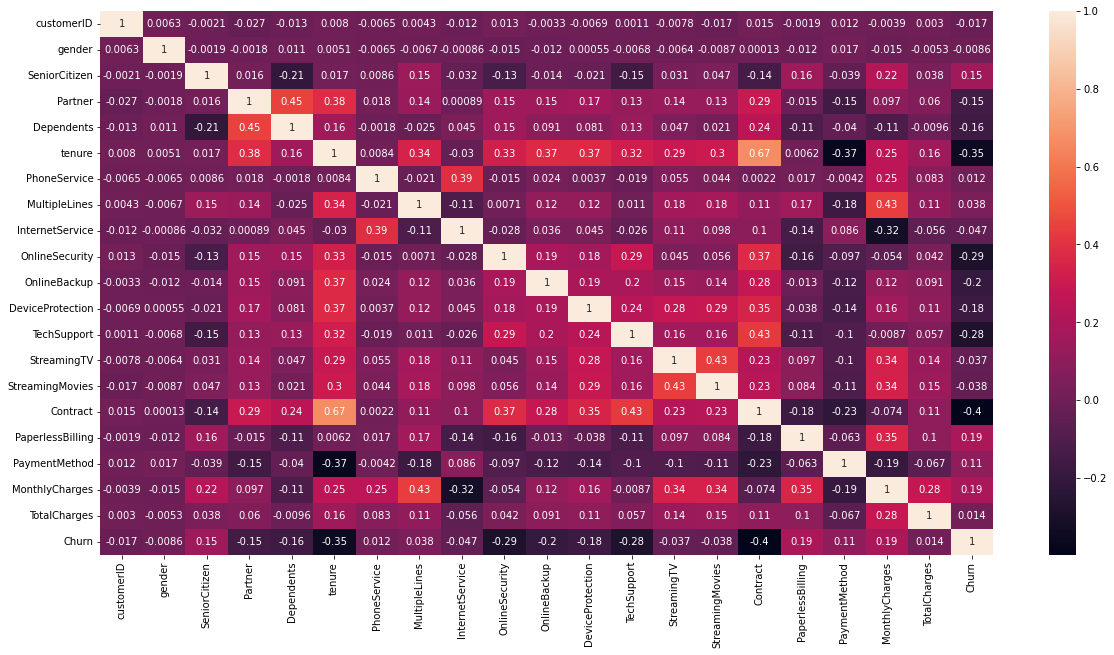

In [56]:
plt.figure(figsize=(20,10))
sns.heatmap(Telecom_customer_churn_corr,annot=True,annot_kws={'size':10})

# Graphical Representation showing the Correlation between all the independent variable and target variable

In [57]:
corr=Telecom_customer_churn.corr()
corr['Churn'].sort_values(ascending=False)

Churn               1.000000
MonthlyCharges      0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
PaymentMethod       0.107062
MultipleLines       0.038037
TotalCharges        0.014479
PhoneService        0.011942
gender             -0.008612
customerID         -0.017447
StreamingTV        -0.036581
StreamingMovies    -0.038492
InternetService    -0.047291
Partner            -0.150448
Dependents         -0.164221
DeviceProtection   -0.178134
OnlineBackup       -0.195525
TechSupport        -0.282492
OnlineSecurity     -0.289309
tenure             -0.352229
Contract           -0.396713
Name: Churn, dtype: float64

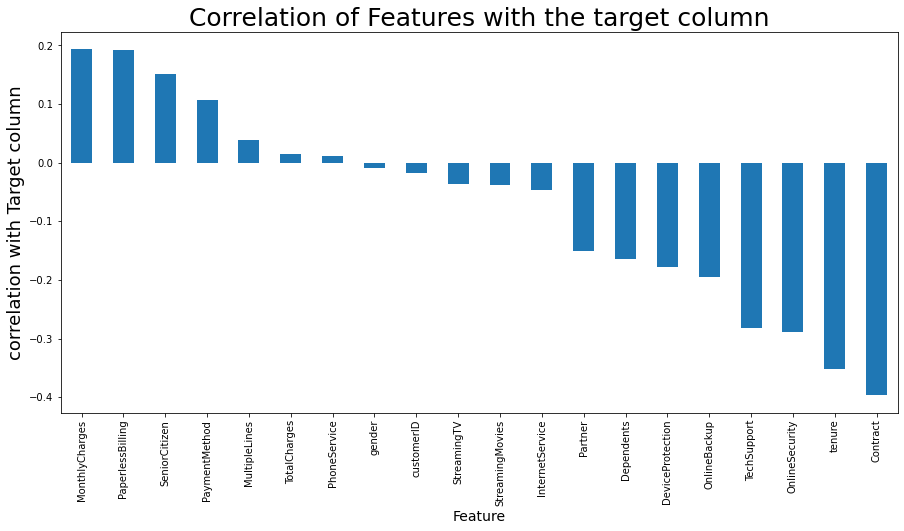

In [58]:
plt.figure(figsize=(15,7))
Telecom_customer_churn.corr()["Churn"].sort_values(ascending=False).drop(["Churn"]).plot.bar()
plt.xlabel("Feature", fontsize= 14)
plt.ylabel("correlation with Target column", fontsize = 18)
plt.title("Correlation of Features with the target column", fontsize=25)
plt.show()

# Checking Skewness:-

In [59]:
Telecom_customer_churn.skew()

# Checking the skewness of the Telecom_customer_churn dataset 

customerID          0.000000
gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.015857
Churn               1.063031
dtype: float64

# Checking Outliers:-

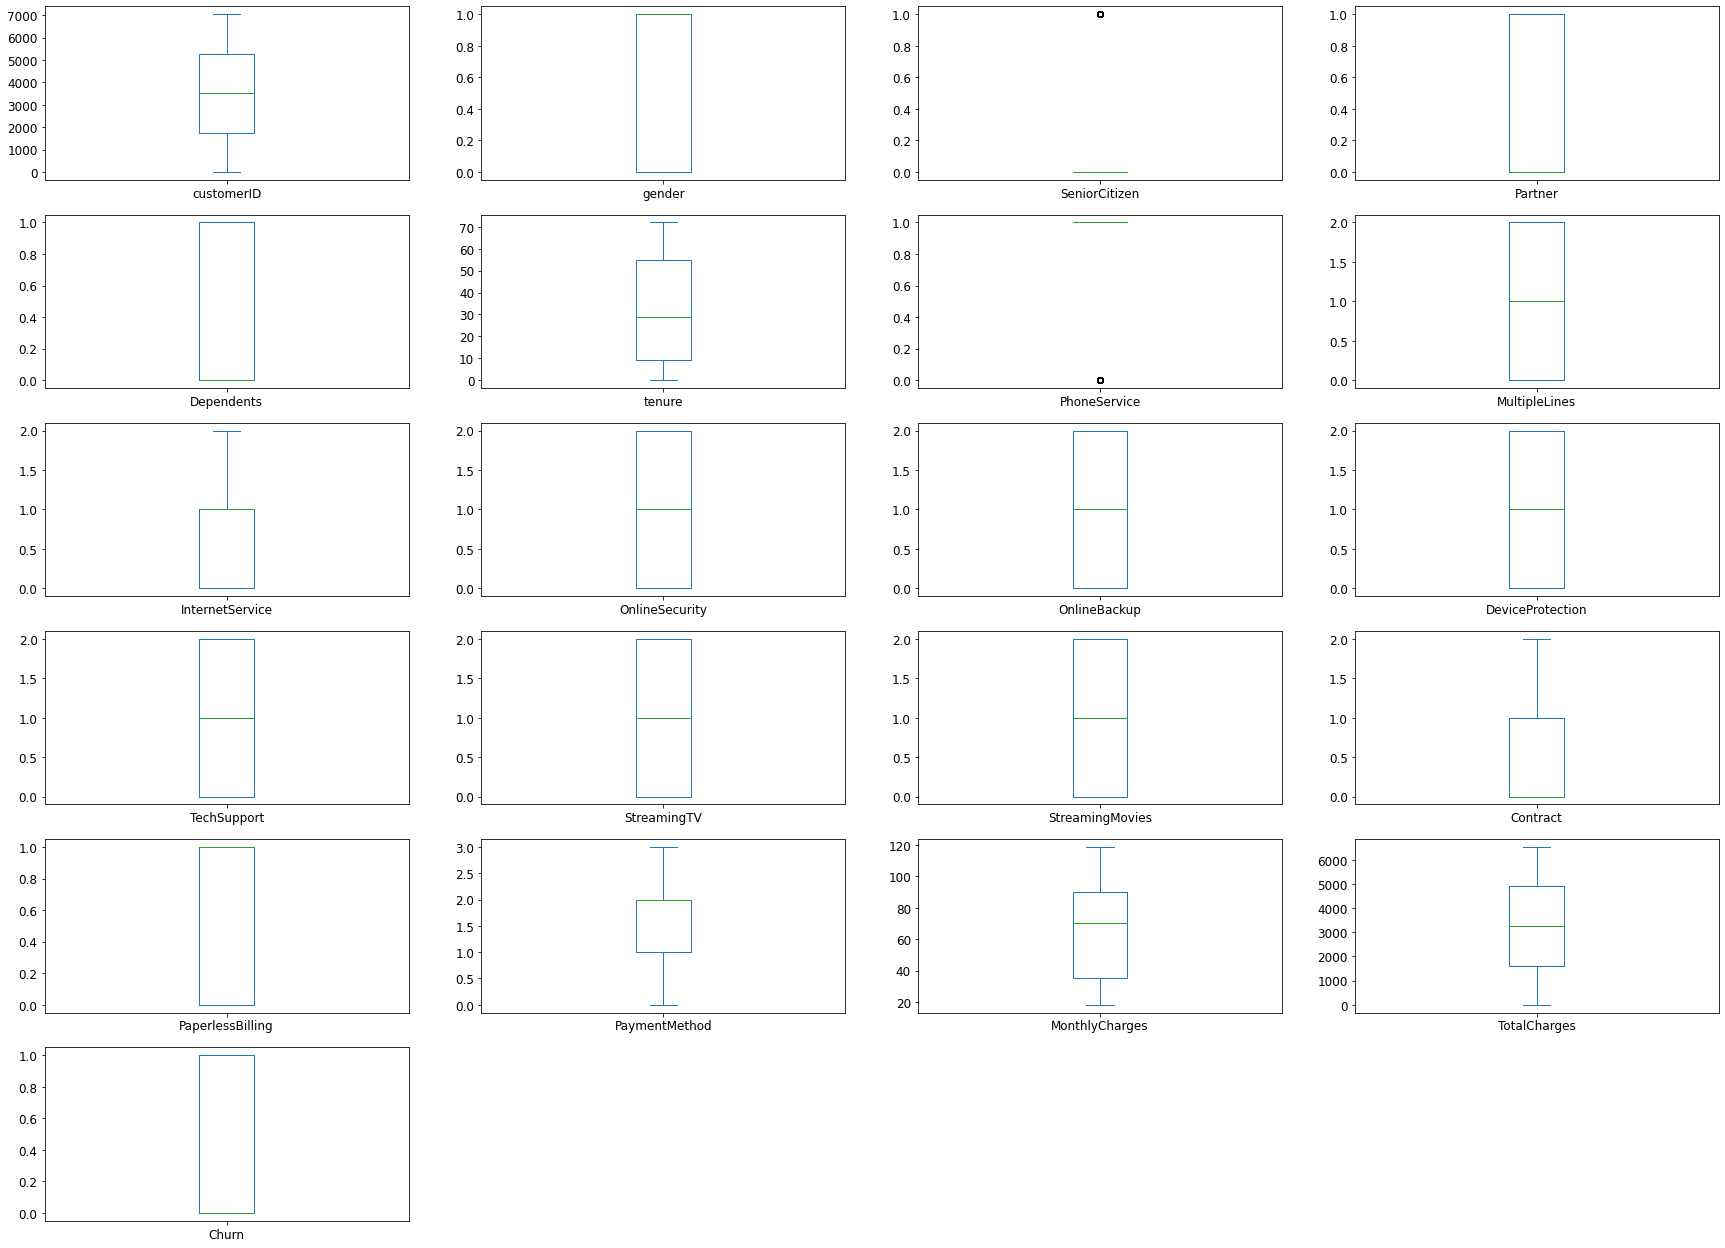

In [60]:
Telecom_customer_churn.plot(kind="box", subplots=True, layout=(8,4), figsize=(30,30), fontsize=12)
plt.show()

# Data Cleaning:-

In [61]:
Telecom_customer_churn

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,2505,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1466,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,157,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1400,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4853,1,0,1,1,24,1,2,0,2,...,2,2,2,2,1,1,3,84.80,1597,0
7039,1525,0,0,1,1,72,1,2,1,0,...,2,0,2,2,1,1,1,103.20,5698,0
7040,3367,0,0,1,1,11,0,1,0,2,...,0,0,0,0,0,1,2,29.60,2994,0
7041,5934,1,1,1,0,4,1,2,1,0,...,0,0,0,0,0,1,3,74.40,2660,1


In [62]:
Telecom_customer_churn.drop(columns=["customerID"],inplace=True)

# Dropping the Customer ID as it is not relevent for the Model Training

# Splitting data into Independent Features and Dependent Features:

In [63]:
x=Telecom_customer_churn.iloc[:,0:-1]
y=Telecom_customer_churn.iloc[:,-1]

Implement Random Over Sampler for Balancing data

In [64]:
from imblearn.over_sampling import RandomOverSampler

In [65]:
os = RandomOverSampler(random_state= 40)

In [66]:
x_res, y_res = os.fit_resample(x,y)

In [67]:
x_res.shape, y_res.shape

((10348, 19), (10348,))

In [68]:
# Check data is balnce or not
from collections import Counter
print('Original Dataset shape{}'.format(Counter(y)))
print("Resampled datset shape{}".format(Counter(y_res)))

Original Dataset shapeCounter({0: 5174, 1: 1869})
Resampled datset shapeCounter({0: 5174, 1: 5174})


# Feature Scaling:

In [69]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=scaler.fit_transform(x_res)

In [70]:
X

array([[-1.01107798, -0.48870886,  1.13216967, ...,  0.34959461,
        -1.32279212, -0.4001878 ],
       [ 0.9890434 , -0.48870886, -0.88325984, ...,  1.33558671,
        -0.38345654, -0.94753413],
       [ 0.9890434 , -0.48870886, -0.88325984, ...,  1.33558671,
        -0.49090821, -1.63711676],
       ...,
       [ 0.9890434 , -0.48870886, -0.88325984, ...,  0.34959461,
         0.52641649, -1.6560816 ],
       [-1.01107798, -0.48870886, -0.88325984, ...,  1.33558671,
         1.10700214,  0.67290603],
       [-1.01107798, -0.48870886, -0.88325984, ...,  1.33558671,
        -0.63822099, -1.57706144]])

# Splitting Data into training and testing set:

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y_res, test_size = 0.3, random_state = 0)

# Model building after balancing the data

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

# Logistic Regression

In [73]:
lr= LogisticRegression()

lr.fit(X_train, y_train)
print("Logistic regression successfully implemented")

y_pred =  lr.predict(X_test)

# confussion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test,y_pred)

print("Confusion Matrix:- ")
print(cm)

lr_accuracy = accuracy_score(y_test,y_pred)

print("accuracy is:- ", lr_accuracy*100)

print("Classification Report:-")
print(  classification_report(y_test, y_pred))

Logistic regression successfully implemented
Confusion Matrix:- 
[[1136  411]
 [ 310 1248]]
accuracy is:-  76.77938808373591
Classification Report:-
              precision    recall  f1-score   support

           0       0.79      0.73      0.76      1547
           1       0.75      0.80      0.78      1558

    accuracy                           0.77      3105
   macro avg       0.77      0.77      0.77      3105
weighted avg       0.77      0.77      0.77      3105



# Decision tree

In [74]:
dtree = DecisionTreeClassifier()

dtree.fit(X_train, y_train)
print("Decision Tree Algorithm is successfully implimented.")

y_pred = dtree.predict(X_test)

#confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:- ")
print(cm)

#accuracy test
dtree_accuracy = accuracy_score(y_test,y_pred)

print("accuracy:- ", dtree_accuracy*100)

print("Classification Report:-")
print(  classification_report(y_test, y_pred))

Decision Tree Algorithm is successfully implimented.
Confusion Matrix:- 
[[1201  346]
 [ 108 1450]]
accuracy:-  85.37842190016103
Classification Report:-
              precision    recall  f1-score   support

           0       0.92      0.78      0.84      1547
           1       0.81      0.93      0.86      1558

    accuracy                           0.85      3105
   macro avg       0.86      0.85      0.85      3105
weighted avg       0.86      0.85      0.85      3105



# Random Forest Classifier

In [75]:
rfc = RandomForestClassifier()

rfc.fit(X_train, y_train)
print("Rndom Forest Classifier successfully Implimented")

y_pred = rfc.predict(X_test)

#confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:- ")
print(cm)

#accuracy test
rfc_accuracy = accuracy_score(y_test,y_pred)

print("accuracy:- ", rfc_accuracy*100)

print("Classification Report:-")
print(  classification_report(y_test, y_pred))

Rndom Forest Classifier successfully Implimented
Confusion Matrix:- 
[[1267  280]
 [  88 1470]]
accuracy:-  88.14814814814815
Classification Report:-
              precision    recall  f1-score   support

           0       0.94      0.82      0.87      1547
           1       0.84      0.94      0.89      1558

    accuracy                           0.88      3105
   macro avg       0.89      0.88      0.88      3105
weighted avg       0.89      0.88      0.88      3105



# K Nearest Neighbors Classifier

In [76]:
knn = KNeighborsClassifier(n_neighbors= 7)
knn.fit(X_train, y_train)

print("K-Nearest Neighbors classifier is successfully implemented")

y_pred = knn.predict(X_test)

#confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:- ")
print(cm)

#accuracy test
knn_accuracy = accuracy_score(y_test,y_pred)

print("accuracy:- ", knn_accuracy*100)

print("Classification Report:-")
print(  classification_report(y_test, y_pred))

K-Nearest Neighbors classifier is successfully implemented
Confusion Matrix:- 
[[1029  518]
 [ 256 1302]]
accuracy:-  75.07246376811594
Classification Report:-
              precision    recall  f1-score   support

           0       0.80      0.67      0.73      1547
           1       0.72      0.84      0.77      1558

    accuracy                           0.75      3105
   macro avg       0.76      0.75      0.75      3105
weighted avg       0.76      0.75      0.75      3105



# Ada Boost Classifier

In [77]:
adb = AdaBoostClassifier()
adb.fit(X_train, y_train)

print("Ada Boost Classifier is successfully implemented")

y_pred = adb.predict(X_test)

#confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:- ")
print(cm)

#accuracy test
adb_accuracy = accuracy_score(y_test,y_pred)

print("accuracy:- ", adb_accuracy*100)

print("Classification Report:-")
print(  classification_report(y_test, y_pred))

Ada Boost Classifier is successfully implemented
Confusion Matrix:- 
[[1146  401]
 [ 302 1256]]
accuracy:-  77.35909822866344
Classification Report:-
              precision    recall  f1-score   support

           0       0.79      0.74      0.77      1547
           1       0.76      0.81      0.78      1558

    accuracy                           0.77      3105
   macro avg       0.77      0.77      0.77      3105
weighted avg       0.77      0.77      0.77      3105



# Naive Bayes

In [78]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print("Naive Bayes is successfully implemented")

y_pred = gnb.predict(X_test)

cm = confusion_matrix(y_pred, y_test)
print("Confusion Matrix:- ")
print(cm)

# Accuracy test
gnb_accuracy = accuracy_score(y_test, y_pred)
print("accuracy:- ", gnb_accuracy*100)

print("Classification Report:-")
print(  classification_report(y_test, y_pred))

Naive Bayes is successfully implemented
Confusion Matrix:- 
[[1106  321]
 [ 441 1237]]
accuracy:-  75.45893719806763
Classification Report:-
              precision    recall  f1-score   support

           0       0.78      0.71      0.74      1547
           1       0.74      0.79      0.76      1558

    accuracy                           0.75      3105
   macro avg       0.76      0.75      0.75      3105
weighted avg       0.76      0.75      0.75      3105



# XG Boost Classifier

In [79]:
from xgboost import XGBClassifier                                                                                                           
xgb = XGBClassifier(max_depth = 4)
xgb.fit(X_train, y_train)
print("XG Boost Classifier is successfully implemented")

y_pred = xgb.predict(X_test)

cm = confusion_matrix(y_pred, y_test)
print("Confusion Matrix:- ")
print(cm)

# Accuracy test
xgb_accuracy = accuracy_score(y_test, y_pred)
print("accuracy:- ", xgb_accuracy*100)

print("Classification Report:-")
print(  classification_report(y_test, y_pred))

XG Boost Classifier is successfully implemented
Confusion Matrix:- 
[[1165  224]
 [ 382 1334]]
accuracy:-  80.4830917874396
Classification Report:-
              precision    recall  f1-score   support

           0       0.84      0.75      0.79      1547
           1       0.78      0.86      0.81      1558

    accuracy                           0.80      3105
   macro avg       0.81      0.80      0.80      3105
weighted avg       0.81      0.80      0.80      3105



# Analysing different models

In [80]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'KNN Classifier', 'Ada Boost Classifier', 'Naive Bayes','XG Boost Classifier'],
    'Accuracy Score': [lr_accuracy, dtree_accuracy, rfc_accuracy,knn_accuracy, adb_accuracy, gnb_accuracy, xgb_accuracy]})

In [81]:
models.sort_values(['Accuracy Score'], ascending=[False])

,Model,Accuracy Score
2,Random Forest,0.881481
1,Decision Tree,0.853784
6,XG Boost Classifier,0.804831
4,Ada Boost Classifier,0.773591
0,Logistic Regression,0.767794
5,Naive Bayes,0.754589
3,KNN Classifier,0.750725


# Cross Validation :-

In [82]:
from sklearn.model_selection import cross_val_score

# Importing the Cross Validation Score from Sklearn Library

In [83]:
scr1=cross_val_score(lr, X, y_res, cv=5)
scr1

array([0.77004831, 0.75603865, 0.7531401 , 0.76558724, 0.78298695])

In [84]:
print("The Cross Validation Score of Logistic Regression is :", scr1.mean())

The Cross Validation Score of Logistic Regression is : 0.7655602487140512


In [85]:
scr2=cross_val_score(dtree,X, y_res, cv=5)
scr2

array([0.86956522, 0.86425121, 0.88647343, 0.89270179, 0.88690188])

In [86]:
print("The Cross Validation Score of Decision Tree Classifier is :", scr2.mean())

The Cross Validation Score of Decision Tree Classifier is : 0.8799787056689151


In [87]:
scr3=cross_val_score(rfc,X, y_res, cv=5)
scr3

array([0.89227053, 0.88888889, 0.90338164, 0.91348478, 0.92315128])

In [88]:
print("The Cross Validation Score of Random Forest Classifier is :", scr3.mean())

The Cross Validation Score of Random Forest Classifier is : 0.9042354237735329


In [89]:
scr4=cross_val_score(knn,X, y_res, cv=5)
scr4

array([0.75748792, 0.74057971, 0.75942029, 0.76317061, 0.77573707])

In [90]:
print("The Cross Validation Score of K Neighbors Classifier is :", scr4.mean())

The Cross Validation Score of K Neighbors Classifier is : 0.7592791215154466


In [91]:
scr5=cross_val_score(adb,X, y_res, cv=5)
scr5

array([0.77777778, 0.75942029, 0.76956522, 0.77332044, 0.7897535 ])

In [92]:
print("Cross Validation Score of Adaboost Classifier Model is", scr5.mean())

Cross Validation Score of Adaboost Classifier Model is 0.7739674467583351


In [93]:
scr6=cross_val_score(gnb, X, y_res, cv=5)
scr6

array([0.76231884, 0.74444444, 0.74154589, 0.75978734, 0.76510391])

In [94]:
print("Cross Validation Score of Naive Bayes Model is", scr6.mean())

Cross Validation Score of Naive Bayes Model is 0.7546400861112862


In [95]:
scr7=cross_val_score(xgb, X, y_res, cv=5)
scr7

array([0.81352657, 0.80628019, 0.81256039, 0.81585307, 0.83615273])

In [96]:
print("Cross Validation Score of xgbboost Classifier Model is", scr7.mean())

Cross Validation Score of xgbboost Classifier Model is 0.8168745899323578


In [97]:
models_cv = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'KNN Classifier', 'Ada Boost Classifier', 'Naive Bayes','XG Boost Classifier'],
    'Cross Validation Score': [scr1.mean(), scr2.mean(), scr3.mean(),scr4.mean(), scr5.mean(), scr6.mean(), scr7.mean()]})

In [98]:
models_cv.sort_values(['Cross Validation Score'], ascending=[False])

,Model,Cross Validation Score
2,Random Forest,0.904235
1,Decision Tree,0.879979
6,XG Boost Classifier,0.816875
4,Ada Boost Classifier,0.773967
0,Logistic Regression,0.765560
3,KNN Classifier,0.759279
5,Naive Bayes,0.754640


# ROC Curve

<Figure size 720x504 with 0 Axes>

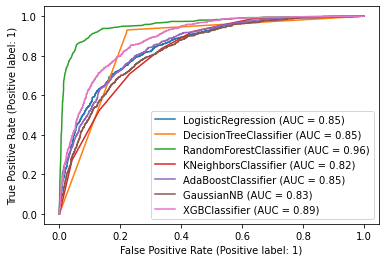

In [100]:
from sklearn.metrics import plot_roc_curve
plt.figure(figsize=(10,7))
fig = plot_roc_curve(lr, X_test, y_test)
fig = plot_roc_curve(dtree, X_test, y_test, ax = fig.ax_)
fig = plot_roc_curve(rfc, X_test, y_test, ax = fig.ax_)
fig = plot_roc_curve(knn, X_test, y_test, ax = fig.ax_)
fig = plot_roc_curve(adb, X_test, y_test, ax = fig.ax_)
fig = plot_roc_curve(gnb, X_test, y_test, ax = fig.ax_)
fig = plot_roc_curve(xgb, X_test, y_test, ax = fig.ax_)

plt.show()

# Hyper Parameter Tuning:-

In [101]:
from sklearn.model_selection import GridSearchCV

# Importing Grid Search CV to perform Hyper Parameter Tuning

In [102]:
parameter={"max_depth":np.arange(2,10), 
           "criterion":["gini",'entropy'],
          "min_samples_split":np.arange(2,10),
          "n_estimators":np.arange(2,10),
          "min_samples_leaf":np.arange(2,10)}

# Taking all the parameters to find the best R2 Score 

In [103]:
GCV=GridSearchCV(RandomForestClassifier(),parameter,cv=5)

In [104]:
GCV.fit(X_train,y_train)

# Training the GridSearchCV model

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'n_estimators': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [105]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 9}

In [113]:
final_model=RandomForestClassifier(criterion="gini", max_depth=9, min_samples_leaf=2, min_samples_split=2, n_estimators=9)
final_model.fit(X_train,y_train)
final_model_pred=final_model.predict(X_test)
acc=accuracy_score(y_test,final_model_pred)
print(acc*100)

80.57971014492755


# Saving the Random Forest Classifier Model (Serialization):-

In [114]:
import pickle
file='Customer Churn Analysis'
pickle.dump(rfc,open(file,'wb'))

In [115]:
load=pickle.load(open('Customer Churn Analysis','rb'))
result=load.score(X_test,y_test)
print(result*100)

88.14814814814815


# Conclusion

In [116]:
conclusion=pd.DataFrame([load.predict(X_test),y_test],index=["Predicted","Original"])

In [117]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,3095,3096,3097,3098,3099,3100,3101,3102,3103,3104
Predicted,1,0,1,1,0,1,0,0,1,1,...,1,0,1,0,1,0,0,1,1,0
Original,1,0,1,0,0,1,0,0,1,1,...,1,0,1,0,1,0,0,1,1,0


# Model Created Successfully !